In [7]:
import csv, contractions
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
import string
import ast, nltk
from langdetect import detect
import pandas as pd
from nltk import word_tokenize, corpus
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

In [ ]:
corpus.stopwords.words('english')

In [4]:
def rename_keys(d, keys):
    for name, pos in d.items():
        print(name, pos)
    return dict([(name, keys.get(pos)) for name, pos in d.items()])


In [3]:
def get_wordnet_pos(tweet):
        pos = nltk.pos_tag(tweet)
        
        tag_dict = {"MD" : "a", "JJ" : "a", "JJR" : "a", "JJS" : "a",
                    "NN" : "n", "NNS" : "n", "NNP" : "n", "NNPS" : "n", "FW": "n", "MD" : "n",
                    "VB" : "v", "VBD" : "v", "VBG" : "v", "VBN" : "v", "VBP" : "v", "VBZ" : "v",
                    "RB" : "r", "RBR" : "r", "RBS" : "r", "RP" : "r"}
                    
        tmp = rename_keys(dict(pos), tag_dict)
        return tmp

In [36]:
lemmatizer = WordNetLemmatizer()
lemmas = []
for word,pos in tmp.items():
    if pos:
        lemmas.append(lemmatizer.lemmatize(word, pos))
    else:
        lemmas.append(lemmatizer.lemmatize(word))

In [ ]:
tmp = get_wordnet_pos(input_text)

In [37]:
english_stemmer = SnowballStemmer(language="french")
inpu = "Pour ces deux causes, à cette époque de la vie si gaie pour les autres enfants, mais pas pour moi :(."
tweet = word_tokenize(inpu)
tweet

['Pour',
 'ces',
 'deux',
 'causes',
 ',',
 'à',
 'cette',
 'époque',
 'de',
 'la',
 'vie',
 'si',
 'gaie',
 'pour',
 'les',
 'autres',
 'enfants',
 ',',
 'mais',
 'pas',
 'pour',
 'moi',
 ':',
 '(',
 '.']

In [38]:
tweet_stemmed = [english_stemmer.stem(word) for word in tweet]
tweet_stemmed

['pour',
 'ce',
 'deux',
 'caus',
 ',',
 'à',
 'cet',
 'époqu',
 'de',
 'la',
 'vi',
 'si',
 'gai',
 'pour',
 'le',
 'autr',
 'enfant',
 ',',
 'mais',
 'pas',
 'pour',
 'moi',
 ':',
 '(',
 '.']

In [37]:
lemmas

['my',
 'uncle',
 "'s",
 'cat',
 'like',
 'play',
 'at',
 'our',
 'yard',
 'where',
 'there',
 'be',
 'many',
 'tree',
 '.']

In [55]:
dict(nltk.pos_tag(ast.literal_eval(df.tweet_no_stopwords[0]))).keys()

dict_keys(['new', 'data', 'ultimately', 'help', 'scientists', 'accurately', 'project', 'fate', 'glacier', '—', 'quickly', 'melting', 'retreating', 'inland', 'far', 'might', 'complete', 'collapse', 'https', '//t.co/mfkqcplwie'])

In [40]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("it's a sentence with punctuation, #hashtags, @mentions, question marks? ^.^ :) >.<")
tokens = [token.text for token in doc if token.text not in string.punctuation]
tokens

['it',
 "'s",
 'a',
 'sentence',
 'with',
 'punctuation',
 'hashtags',
 '@mentions',
 'question',
 'marks',
 '^.^',
 ':)',
 '>.<']

In [ ]:
inputs = "I'd've been working out this week but I was busy, let's see if I'll work out at my parents' place."
output = [contractions.fix(word) for word in inputs]
output

In [39]:
df = pd.read_csv("preprocessed.csv")
df_labeled = pd.read_csv("labeled.csv")

/Users/farah/venv/MLinPractice/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (22,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [40]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest\r', 'label', 'tweet_tokenized', 'tweet_no_punctuation',
       'tweet_no_stopwords', 'stemmed'],
      dtype='object')

In [41]:
df.stemmed

0         ['new', 'data', 'ultim', 'help', 'scientist', ...
1         ['bus', 'amp', 'put', 'million', 'american', '...
2         ['transit', 'excel', 'python', 'might', 'seem'...
3         ['fraser', 'lewi', 'present', 'bayesian', 'dif...
4         ['larg', 'increas', 'much', 'univers', 'larp',...
                                ...                        
295806    ['read', 'chart', 'war', 'polit', 'power', 'da...
295807    ['put', 'quick', 'littl', 'rfp', 'database-dat...
295808    ['great', 'present', 'chart', 'war', 'polit', ...
295809    ['rt', 'also', 'check', 'data', 'visual', 'ii'...
295810    ['new', 'data', 'visual', 'applic', 'perform',...
Name: stemmed, Length: 295811, dtype: object

In [13]:
langs = set(df.language)

In [22]:
df.language.count()

295811

In [24]:
en_tweets = df.language[df.language=='en'].count()

In [27]:
ge_tweets = df.language[df.language=='de'].count()

In [34]:
tmp = dict([(lang,df.language[df.language==lang].count()) for lang in langs])

In [47]:
tmp['fr']

3287

In [36]:
count = [x for x in tmp]

In [43]:
langs = sorted(tmp, key=lambda i: int(tmp[i]), reverse=True)
count = sorted([num for lang, num in tmp.items()], reverse=True)

In [46]:
langs

['en',
 'es',
 'fr',
 'de',
 'it',
 'in',
 'und',
 'nl',
 'pt',
 'tl',
 'ro',
 'ca',
 'ru',
 'da',
 'th',
 'ar',
 'tr',
 'ja',
 'no',
 'lt',
 'ht',
 'sv',
 'et',
 'cs',
 'pl',
 'cy',
 'zh',
 'hi',
 'fi',
 'ta',
 'uk',
 'iw',
 'hu',
 'sl',
 'ko',
 'lv',
 'te',
 'bg',
 'bn',
 'el',
 'fa',
 'eu',
 'sr',
 'gu',
 'is',
 'ml',
 'mr',
 'kn',
 'ur',
 'hy']

In [71]:
'ar' in langs

True

In [42]:
count

[283240,
 3492,
 3287,
 811,
 748,
 631,
 546,
 396,
 389,
 362,
 291,
 244,
 219,
 182,
 143,
 109,
 93,
 92,
 65,
 64,
 51,
 51,
 49,
 49,
 42,
 21,
 20,
 18,
 15,
 15,
 11,
 8,
 7,
 7,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1]

In [28]:
en_tweets, ge_tweets

(283240, 811)

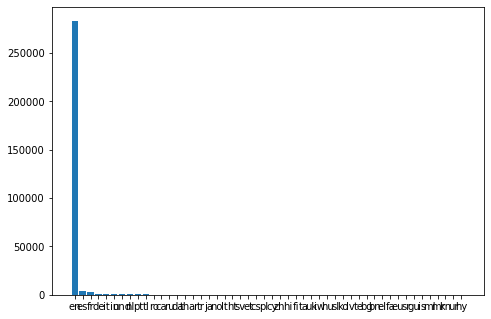

<AxesSubplot:>

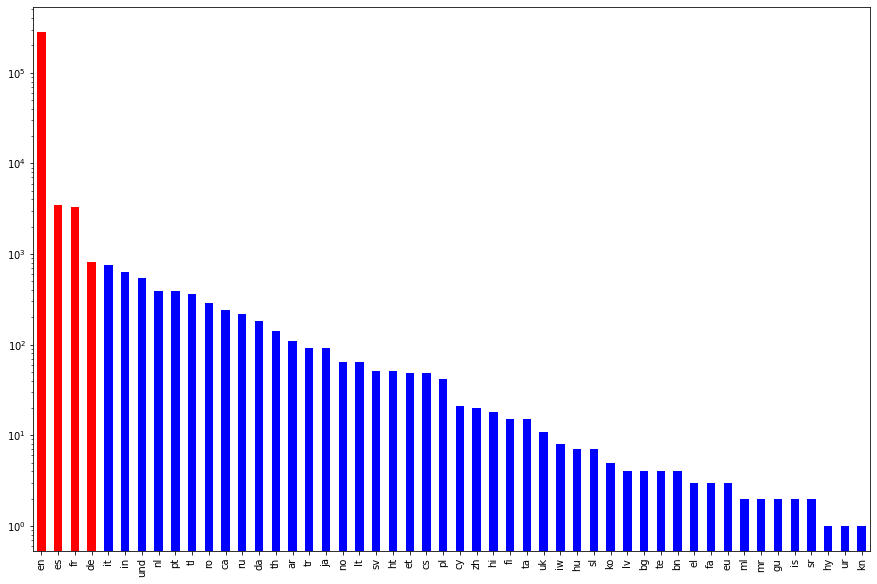

In [62]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
tmp = ['r', 'r', 'r', 'r', 'r', 'b', 'b', 'r', 'r', 'b', 'r', 'b', 'r', 'b', 'r', 'b', 'r', 'b', 'b', 'r', 'b', 'r']
[tmp.append('b') for i in range(len(tmp), 47)]

df["language"].value_counts().plot(kind = 'bar', logy = True, figsize = (15,10), color=tmp)

In [46]:
df[df.language=='th'].language

10281     th
12435     th
21359     th
22523     th
25774     th
          ..
271881    th
271912    th
274878    th
274884    th
285224    th
Name: language, Length: 143, dtype: object

In [ ]:
set(df.language)

In [5]:
import os
os.listdir('~/nltk_data/corpora/stopwords/')

FileNotFoundError: [Errno 2] No such file or directory: '~/nltk_data/corpora/stopwords/'

In [48]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,reply_to,retweet_date,translate,trans_src,trans_dest\r,label,tweet_no_punctuation,tweet_tokenized,tweet_no_stopwords,lemmatized
0,1.382118e+18,1.382118e+18,2021-04-14 05:15:01 IST,2021-04-14,05:15:01,530.0,1.940224e+07,sciencenews,Science News,NaN,...,[],NaN,NaN,NaN,\r,True,"['these', 'new', 'data', 'will', 'ultimately',...","['these', 'new', 'data', 'will', 'ultimately',...","['new', 'data', 'ultimately', 'help', 'scienti...","['new', 'data', 'ultimately', 'help', 'scienti..."
1,1.382111e+18,1.382110e+18,2021-04-14 04:50:19 IST,2021-04-14,04:50:19,530.0,1.255593e+18,tomzmich2020,Tom Zmich,NaN,...,[],NaN,NaN,NaN,\r,False,"['under', 'the', 'bus', 'amp', 'put', 'million...","['under', 'the', 'bus', 'amp', 'put', 'million...","['bus', 'amp', 'put', 'millions', 'americans',...","['bus', 'amp', 'put', 'million', 'american', '..."
2,1.382109e+18,1.382109e+18,2021-04-14 04:42:00 IST,2021-04-14,04:42:00,530.0,7.888987e+17,tdatascience,Towards Data Science,NaN,...,[],NaN,NaN,NaN,\r,True,"['transitioning', 'from', 'excel', 'to', 'pyth...","['transitioning', 'from', 'excel', 'to', 'pyth...","['transitioning', 'excel', 'python', 'might', ...","['transition', 'excel', 'python', 'might', 'se..."
3,1.382104e+18,1.382104e+18,2021-04-14 04:19:00 IST,2021-04-14,04:19:00,530.0,7.888987e+17,tdatascience,Towards Data Science,NaN,...,[],NaN,NaN,NaN,\r,False,"['fraser', 'lewis', 'presents', 'bayesian', 'd...","['fraser', 'lewis', 'presents', 'bayesian', 'd...","['fraser', 'lewis', 'presents', 'bayesian', 'd...","['fraser', 'lewis', 'present', 'bayesian', 'di..."
4,1.382101e+18,1.382101e+18,2021-04-14 04:07:23 IST,2021-04-14,04:07:23,530.0,2.595244e+09,esyudkowsky,Eliezer Yudkowsky,NaN,...,[],NaN,NaN,NaN,\r,False,"['is', 'largely', 'to', 'increase', 'how', 'mu...","['is', 'largely', 'to', 'increase', 'how', 'mu...","['largely', 'increase', 'much', 'universal', '...","['largely', 'increase', 'much', 'universal', '..."


In [ ]:
punctuation = [x for x in string.punctuation[1:-1]]
punctuation

In [19]:
word_tokenize("it's a sentence with punctuation hashtags mentions question marks") == x

True

In [27]:
x = [word for word in inputs if word not in string.punctuation]
x

['it',
 "'s",
 'a',
 'sentence',
 'with',
 'punctuation',
 'hashtags',
 'mentions',
 'question',
 'marks']

In [24]:
inputs = word_tokenize("it's a sentence with punctuation, #hashtags, @mentions, question marks? :) *_*")
# output = [word for word in inputs if word not in string.punctuation]
inputs

['it',
 "'s",
 'a',
 'sentence',
 'with',
 'punctuation',
 ',',
 '#',
 'hashtags',
 ',',
 '@',
 'mentions',
 ',',
 'question',
 'marks',
 '?',
 ':',
 ')',
 '*',
 '_',
 '*']

In [28]:
"?" in string.punctuation

True

In [40]:
len(set(df.language))

50

In [6]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest\r', 'label', 'tweet_no_punctuation', 'tweet_tokenized',
       'tweet_no_stopwords'],
      dtype='object')

In [5]:
df.tweet_no_punctuation

0         ['these', 'new', 'data', 'will', 'ultimately',...
1         ['under', 'the', 'bus', 'amp', 'put', 'million...
2         ['transitioning', 'from', 'excel', 'to', 'pyth...
3         ['fraser', 'lewis', 'presents', 'bayesian', 'd...
4         ['is', 'largely', 'to', 'increase', 'how', 'mu...
                                ...                        
295806    ['reading', 'chart', 'wars', 'the', 'political...
295807    ['i', 'putting', 'out', 'a', 'quick', 'little'...
295808    ['great', 'presentation', 'by', 'chart', 'wars...
295809    ['rt', 'u', 'should', 'also', 'check', 'out', ...
295810    ['new', 'data', 'visualization', 'application'...
Name: tweet_no_punctuation, Length: 295811, dtype: object

In [14]:
df.tweet_tokenized

0         ['these', 'new', 'data', 'will', 'ultimately',...
1         ['under', 'the', 'bus', 'amp', 'put', 'million...
2         ['transitioning', 'from', 'excel', 'to', 'pyth...
3         ['fraser', 'lewis', 'presents', 'bayesian', 'd...
4         ['is', 'largely', 'to', 'increase', 'how', 'mu...
                                ...                        
295806    ['reading', 'chart', 'wars', 'the', 'political...
295807    ['i', 'putting', 'out', 'a', 'quick', 'little'...
295808    ['great', 'presentation', 'by', 'chart', 'wars...
295809    ['rt', 'u', 'should', 'also', 'check', 'out', ...
295810    ['new', 'data', 'visualization', 'application'...
Name: tweet_tokenized, Length: 295811, dtype: object

In [6]:
df.tweet_no_stopwords

0         ['new', 'data', 'ultimately', 'help', 'scienti...
1         ['bus', 'amp', 'put', 'millions', 'americans',...
2         ['transitioning', 'excel', 'python', 'might', ...
3         ['fraser', 'lewis', 'presents', 'bayesian', 'd...
4         ['...', 'largely', 'increase', 'much', 'univer...
                                ...                        
295806    ['reading', 'chart', 'wars', 'political', 'pow...
295807    ["'m", 'putting', 'quick', 'little', 'rfp', 'd...
295808    ['great', 'presentation', 'alexlundry', 'chart...
295809    ['rt', 'briandevine', 'also', 'check', 'data',...
295810    ['new', 'data', 'visualization', 'application'...
Name: tweet_no_stopwords, Length: 295811, dtype: object

In [65]:
df.tweet_no_punctuation[0]

"['these', 'new', 'data', 'will', 'ultimately', 'help', 'scientists', 'more', 'accurately', 'project', 'the', 'fate', 'of', 'the', 'glacier', '—', 'how', 'quickly', 'it', 'is', 'melting', 'and', 'retreating', 'inland', 'and', 'how', 'far', 'it', 'might', 'be', 'from', 'complete', 'collapse', 'https', '//t.co/mfkqcplwie']"

In [11]:
len(set(df.language)), len(df.language)

(50, 295811)

In [77]:
df.tweet_no_punctuation[295807]

'Im putting out a quick little RFP for some databasedatavisualizationapp developement work Who in Austin have I not thought of think'

In [87]:
df_labeled.tweet[8433]

'Congrats, @quantifind on raising $22 million! The #NSFfunded company uses “data science to help automate financial crimes investigations.”  https://t.co/0cnwAQ6iow'

In [31]:
df.column

AttributeError: 'DataFrame' object has no attribute 'column'

In [88]:
df_labeled.mentions[8433]

"[{'screen_name': 'quantifind', 'name': 'quantifind', 'id': '179275414'}]"